----- 正常データ -----
RMSE = 0.00878148145615281
NRMSE = 0.20999256811759034


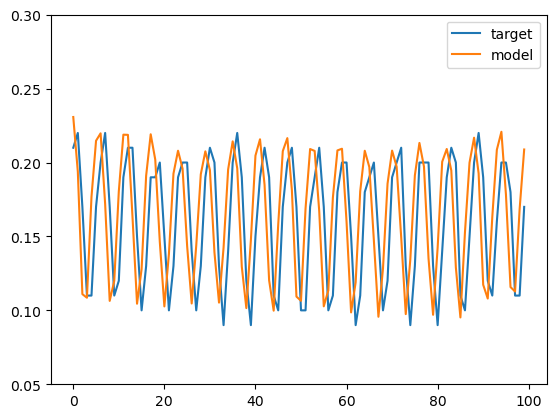

----- 異常データ -----
RMSE = 0.03872217213069871
NRMSE = 0.5422847932749064


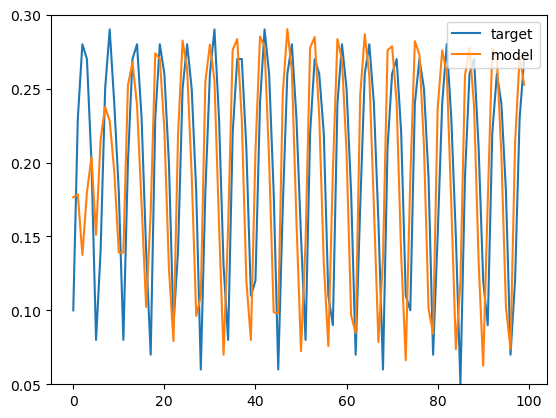

In [12]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

#################################################################
# ノイズが混じったsin波の予測
#################################################################

import numpy as np
import matplotlib.pyplot as plt
from model import ESN, Tikhonov
import csv

def generate_data(data):
    u = np.array(data)
    d = np.roll(u, -1)
    return u, d

if __name__ == '__main__':
    with open('正常.csv') as f:
        reader = csv.reader(f)
        data_normal = [float(row[1]) for row in reader]
    with open('異常.csv') as f:
        reader = csv.reader(f)
        data_error = [float(row[1]) for row in reader]
    
    # データ長
    T = 900  # 訓練用
    T_test = 100  # 検証用
    
    u, d = generate_data(data_normal)
    u_error, d_error = generate_data(data_error)

    # 学習・テスト用情報
    train_U = u[:T].reshape(-1, 1)
    train_D = d[:T].reshape(-1, 1)
    test1_U = u[T:T+T_test].reshape(-1, 1)
    test1_D = d[T:T+T_test].reshape(-1, 1)
    test2_U = u_error[T:T+T_test].reshape(-1, 1)
    test2_D = d_error[T:T+T_test].reshape(-1, 1)

    # ESNモデル
    N_x = 50  # リザバーのノード数
    model = ESN(train_U.shape[1], train_D.shape[1], N_x, 
                density=0.15, input_scale=0.1, rho=0.9,
                fb_scale=0.1, fb_seed=0)

    # 学習（リッジ回帰）
    train_Y = model.train(train_U, train_D, 
                          Tikhonov(N_x, train_D.shape[1], 1e-4)) 

    # モデル出力
    test1_Y = model.predict(test1_U)
    test2_Y = model.predict(test2_U)

    # 評価（テスト誤差RMSE, NRMSE）
    RMSE1 = np.sqrt(((test1_D - test1_Y) ** 2).mean())
    NRMSE1 = RMSE1/np.sqrt(np.var(test1_D))
    RMSE2 = np.sqrt(((test2_D - test2_Y) ** 2).mean())
    NRMSE2 = RMSE2/np.sqrt(np.var(test2_D))
    
    # グラフ表示用データ
    T_disp = (-100, 100)
    t_axis = np.arange(T_disp[0], T_disp[1])
    disp_U = np.concatenate((train_U[T_disp[0]:], test1_U[:T_disp[1]]))
    disp_D = np.concatenate((train_D[T_disp[0]:], test1_D[:T_disp[1]]))
    disp_Y = np.concatenate((train_Y[T_disp[0]:], test1_Y[:T_disp[1]]))
        
    # 正常データプロット
    print("----- 正常データ -----")
    print('RMSE =', RMSE1)
    print('NRMSE =', NRMSE1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0.05, 0.3)
    plt.plot(np.arange(0, 100), test1_U[:T_disp[1]], label="target")
    plt.plot(np.arange(0, 100), test1_Y[:T_disp[1]], label="model")
    plt.legend(loc = "upper right")
    plt.show()
    
    # 異常データプロット
    print("----- 異常データ -----")
    print('RMSE =', RMSE2)
    print('NRMSE =', NRMSE2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0.05, 0.3)
    plt.plot(np.arange(0, 100), test2_U[:T_disp[1]], label="target")
    plt.plot(np.arange(0, 100), test2_Y[:T_disp[1]], label="model")
    plt.legend(loc = "upper right")


----- 正常データ(学習に使っていない) -----
RMSE = 0.008631243796713086
NRMSE = 0.20458009815434555


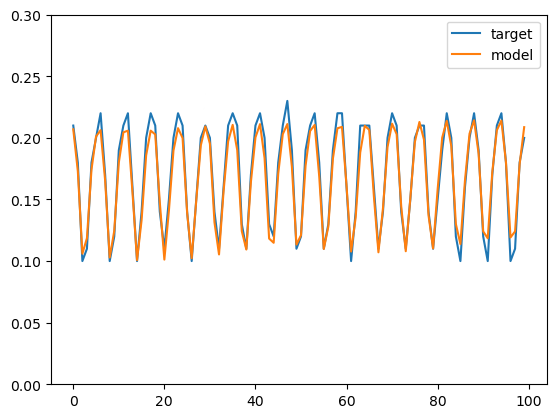

----- 正常データ(学習に使った) -----
RMSE = 0.03186025361988096
NRMSE = 0.7576633385894463


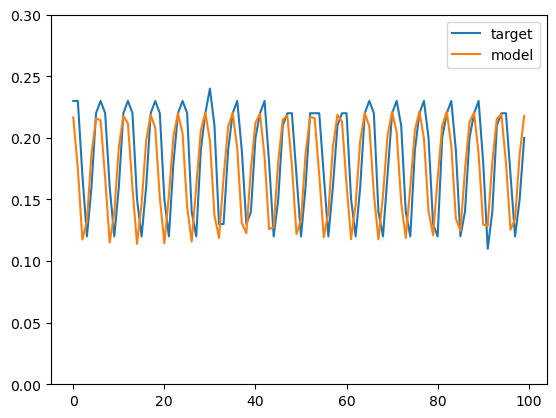

----- 異常データ -----
RMSE = 0.09625221650040822
NRMSE = 1.3182712134646042


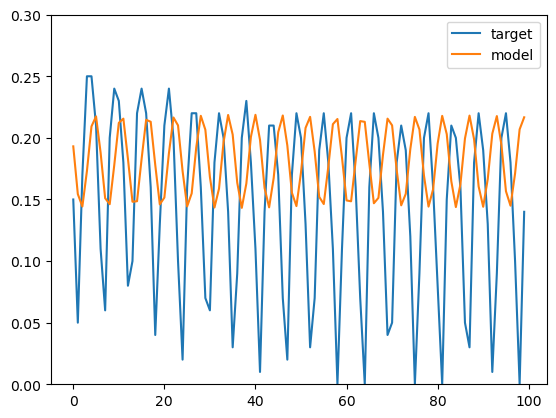

In [33]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

#################################################################
# ノイズが混じったsin波の予測2
#################################################################

import numpy as np
import matplotlib.pyplot as plt
from model import ESN, Tikhonov
import csv

def generate_data(data):
    u = np.array(data)
    d = np.roll(u, -1)
    return u, d

if __name__ == '__main__':
    with open('正常.csv') as f:
        reader = csv.reader(f)
        data_normal = [float(row[1]) for row in reader]
    with open('異常.csv') as f:
        reader = csv.reader(f)
        data_error = [float(row[1]) for row in reader]
    
    # データ長
    start = 100
    T = 900  # 訓練用
    T_test = 100  # 検証用
    
    u, d = generate_data(data_normal)
    u_error, d_error = generate_data(data_error)

    # 学習・テスト用情報
    train_U = u[start:T+start].reshape(-1, 1)
    train_D = d[start:T+start].reshape(-1, 1)

    # ESNモデル
    N_x = 100 # リザバーのノード数
    model = ESN(train_U.shape[1], train_D.shape[1], N_x, 
                density=0.15, input_scale=0.1, rho=0.9,
                fb_scale=0.1, fb_seed=0)

    # 学習（リッジ回帰）
    model.train(train_U, train_D, 
                          Tikhonov(N_x, train_D.shape[1], 1e-4)) 

            
    # 正常データプロット(学習に使っていないデータ)
    test1_U = u[start+T:start+T+T_test].reshape(-1, 1)
    test1_D = d[start+T:start+T+T_test].reshape(-1, 1)
    test1_Y = model.run(test1_U)
    RMSE1 = np.sqrt(((test1_D - test1_Y) ** 2).mean())
    NRMSE1 = RMSE1/np.sqrt(np.var(test1_D))
    T_disp = 100
    print("----- 正常データ(学習に使っていない) -----")
    print('RMSE =', RMSE1)
    print('NRMSE =', NRMSE1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0, 0.3)
    plt.plot(np.arange(0, 100), test1_D[:T_disp], label="target")
    plt.plot(np.arange(0, 100), test1_Y[:T_disp], label="model")
    plt.legend(loc = "upper right")
    plt.show()
    
    
    # 正常データプロット(学習に使ったデータ)
    test_Y = model.run(train_U)
    RMSE = np.sqrt(((train_D - test_Y) ** 2).mean())
    NRMSE = RMSE/np.sqrt(np.var(train_D))
    T_disp = 100
    print("----- 正常データ(学習に使った) -----")
    print('RMSE =', RMSE)
    print('NRMSE =', NRMSE)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0, 0.3)
    plt.plot(np.arange(0, 100), train_D[:T_disp], label="target")
    plt.plot(np.arange(0, 100), test_Y[:T_disp], label="model")
    plt.legend(loc = "upper right")
    plt.show()
    
    # 異常データプロット(学習に使っていないデータ)
    test2_U = u_error[start+T:start+T+T_test].reshape(-1, 1)
    test2_D = d_error[start+T:start+T+T_test].reshape(-1, 1)
    test2_Y = model.run(test2_U)
    RMSE2 = np.sqrt(((test2_D - test2_Y) ** 2).mean())
    NRMSE2 = RMSE2/np.sqrt(np.var(test2_D))
    print("----- 異常データ -----")
    print('RMSE =', RMSE2)
    print('NRMSE =', NRMSE2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0, 0.3)
    plt.plot(np.arange(0, 100), test2_D[:T_disp], label="target")
    plt.plot(np.arange(0, 100), test2_Y[:T_disp], label="model")
    plt.legend(loc = "upper right")
    plt.show()


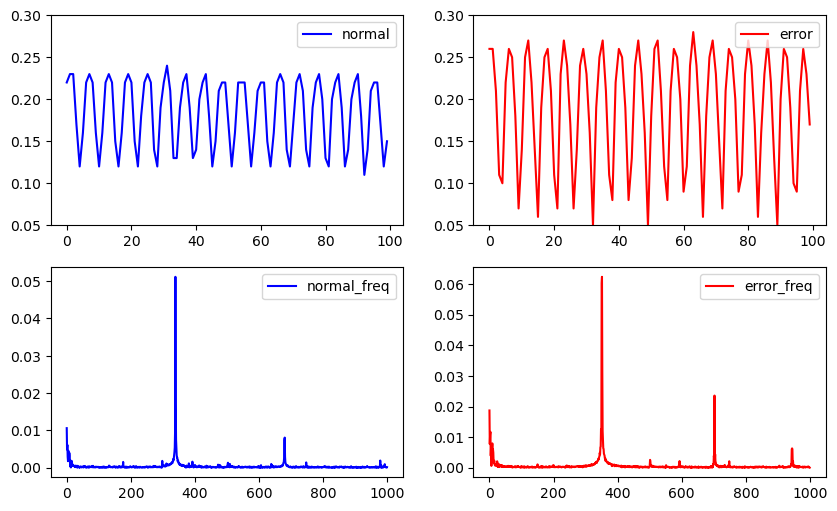

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

if __name__ == '__main__':
    start = 100
    N = 100
    N_freq = 2000
    with open('正常.csv') as f:
        reader = csv.reader(f)
        data_normal = [float(row[1]) for row in reader]
    with open('異常.csv') as f:
        reader = csv.reader(f)
        data_error = [float(row[1]) for row in reader]

    # 高速フーリエ変換(FFT) 通常
    F_normal = np.fft.fft(data_normal[start:N_freq+start])
    F_abs_normal = np.abs(F_normal/(N_freq/2))

    # 高速フーリエ変換(FFT) 異常
    F_error = np.fft.fft(data_error[start:N_freq+start])
    F_abs_error = np.abs(F_error/(N_freq/2))

    fig = plt.figure(figsize = (10,6))
    # 通常時の出力
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(data_normal[start:N+start], label="normal", color="blue")
    ax1.legend(loc = 'upper right')
    ax1.set_ylim(0.05, 0.3)

    # 通常時の周波数成分
    ax2 = fig.add_subplot(2, 2, 3)
    ax2.plot(F_abs_normal[1:int(N_freq/2)+1], label="normal_freq", color="blue")
    ax2.legend(loc = 'upper right')
    
    # 異常時の出力
    ax3 = fig.add_subplot(2, 2, 2)
    ax3.plot(data_error[start:N+start], label="error", color="red")
    ax3.legend(loc = 'upper right')
    ax3.set_ylim(0.05, 0.3)

    # 異常時の周波数成分
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(F_abs_error[1:int(N_freq/2)+1], label="error_freq", color="red")
    ax4.legend(loc = 'upper right')

    plt.show()